#install

In [174]:
#!pip install PyKomoran

In [176]:
#!pip install konlpy
##!pip install hgtk
#!pip install wordcloud

In [177]:
# 한국어 폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [178]:
#경고무시
#import warnings

#warnings.filterwarnings("ignore")

#데이터 불러오기

In [123]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CP22/[jh]labeled_data_0113_new.csv')

In [124]:
df.head()

,Unnamed: 0,Unnamed: 0.1,date,time,celeb,code,comments,file,label
0,0,1,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,NaN,1
1,1,2,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,NaN,2
2,2,3,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,NaN,1
3,3,4,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,NaN,1
4,4,5,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,NaN,1


#워드클라우드

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords

In [12]:
%matplotlib inline
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [14]:
#텍스트 전처리
def clean(text) :
  import re
  #한국어와 알파벳만 남기고 제거
  #4번 이상 반복되는 문자는 2글자만 남김
  #2칸이상 공백은 1칸만 남김
  pattern1 = re.compile(r"[^ A-Za-z0-9가-힣]+")
  pattern2 = re.compile(r"(.)\1{2,}")
  pattern3 = re.compile(r"\s+")

  text = pattern1.sub("", str(text))
  text = pattern2.sub(r"\1" * 2, str(text))
  text = pattern3.sub(" ", str(text))

  return text.strip()

In [8]:
from PyKomoran import *

In [9]:
komoran = Komoran("STABLE")

In [10]:
def tokenize(text) :
  result = []
  stop_pos_tags = ['IC', 'JKS', 'JKC', 'JKG', 'JKO',
                 'JKB', 'JKV', 'JKQ', 'JX', 'EF', 'ETN',
                 'ETM', 'XSA', 'SF', 'SP', 'SS', 'SE', 'SO',
                 'SL', 'SH', 'SW', 'NF', 'NV', 'SN', 'NA']

  pairs = komoran.get_list(text)
  for pair in pairs :
    morph = pair.get_first()
    pos = pair.get_second
    if pos not in stop_pos_tags:
      if pos in ['VV', 'VA', 'VX', 'VCP', 'VCN']:
        morph = morph+'다'

      result.append(morph)
  
  noun = (komoran.get_nouns(text))
  if pos not in stop_pos_tags:
    if pos in ['VV', 'VA', 'VX', 'VCP', 'VCN'] :
      noun = noun+'(시)다'

  return noun

In [126]:
#VAYA제거
df = df[df.celeb != 'VAYA']
df = df.dropna(subset=['comments']).reset_index(drop=True)

#'~님이 참여했습니다'제거
df = df[~df['comments'].str.contains("참여했습니다", na=False, case=False)]

#'~님이 나갔습니다' 제거
df = df[~df['comments'].str.contains("나갔습니다", na=False, case=False)]

df = df[~df['comments'].str.contains('""', na=False, case=False)]
#코멘트 전처리
df.comments = [clean(c) for c in df.comments]

#label 별로 분류
df_nega = df[df.label==0].comments
df_neut = df[df.label==1].comments
df_posi = df[df.label==2].comments

#txt파일로 저장
df_nega.to_csv('/content/drive/MyDrive/CP22/df_nega.txt', sep='\t', index=False, header=False)
df_neut.to_csv('/content/drive/MyDrive/CP22/df_neut.txt', sep='\t', index=False, header=False)
df_posi.to_csv('/content/drive/MyDrive/CP22/df_posi.txt', sep='\t', index=False, header=False)

#txt파일 불러오기
df_nega_txt = open('/content/drive/MyDrive/CP22/df_nega.txt', mode='r',encoding='utf8').read()
df_neut_txt = open('/content/drive/MyDrive/CP22/df_neut.txt', mode='r',encoding='utf8').read()
df_posi_txt = open('/content/drive/MyDrive/CP22/df_posi.txt', mode='r',encoding='utf8').read()

In [133]:
df_posi_txt = df_posi_txt.replace('세요', '').replace('오늘', '').replace('닉네임', '').replace('Operater', '').replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','').replace('" "', '').replace('""', '')

In [134]:
#토크나이징-긍정
komo_df_posi = tokenize(df_posi_txt)

In [135]:
#2글자 이상 추출
komo_new_posi = []
for word in komo_df_posi:
  if len(word) >= 2:
    komo_new_posi.append(word)

In [136]:
#단어 count
from collections import Counter
cnt_posi = Counter(komo_new_posi)

In [137]:
sorted_dict_posi = sorted(cnt_posi.items(), key = lambda item: item[1], reverse = True)

긍정 라벨링 워드클라우드

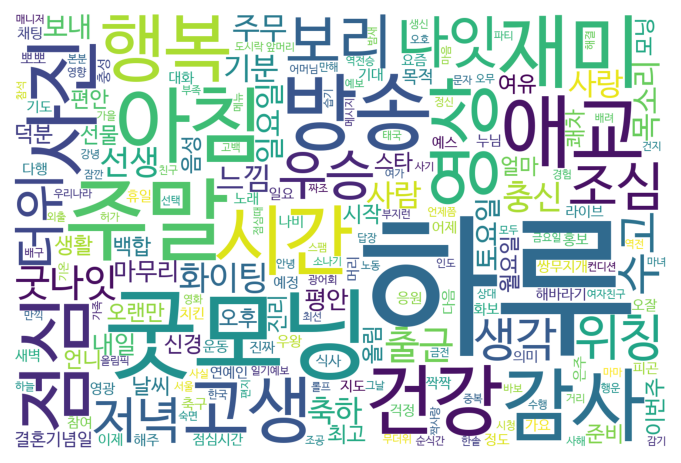

In [173]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white',width=1500, height=1000).generate_from_frequencies(dict(sorted_dict_posi)) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [150]:
from konlpy.tag import Okt
okt = Okt()

In [151]:
okt_morphs = okt.pos(df_neut_txt)

In [153]:
Noun_words = []
for word, pos in okt_morphs:
  if pos =='Noun':
    Noun_words.append(word)

In [155]:
#2글자 이상 추출
okt_new_neut = []
for word in Noun_words:
  if len(word) >= 2:
    okt_new_neut.append(word)

In [167]:
stop_words = ['중이', '무슨', '뭔가', '항상', '조만간',
              '하란', '지난', '보고', '이건', '요안',
              '일단', '번재', '는걸', '바로', '이제',
              '갑자기', '지나', '나니', '부리나케', '드릴', '안보',
              '이오', '아무', '여야', '오오', '도록', '혹시',
              '저번']

set_Noun_words = set(okt_new_neut)
for word in set_Noun_words:
  if word in stop_words:
    while word in okt_new_neut: okt_new_neut.remove(word)

In [168]:
cnt_neut = Counter(okt_new_neut)

In [169]:
sorted_dict_neut = sorted(cnt_neut.items(), key = lambda item: item[1], reverse = True)

중립(일상) 라벨링 워드클라우드

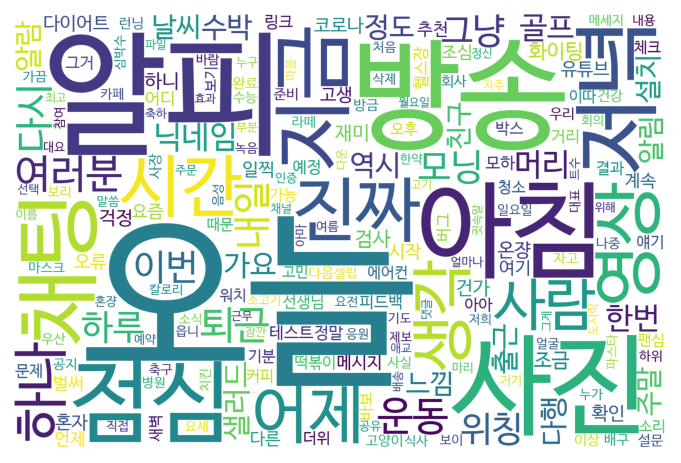

In [172]:
# label : 긍정 인 워드클라우드 생성(normal_comment)
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white',width=1500, height=1000).generate_from_frequencies(dict(sorted_dict_neut)) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()